In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from matplotlib import pyplot as plt
import numpy as np
import json

In [2]:
with open('../dataset/metrics.json') as f:
    metrics = json.load(f)

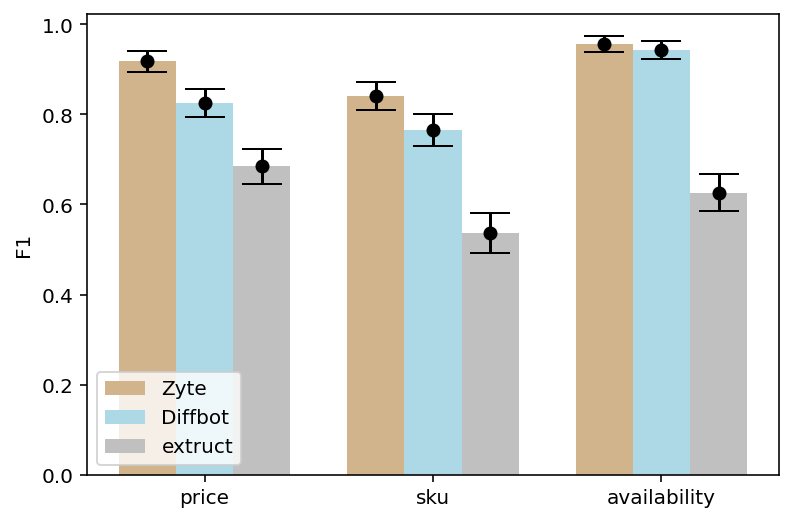

In [3]:
attributes = ['price', 'sku', 'availability'] #, 'InStock', 'OutOfStock']
names = ['Zyte', 'Diffbot', 'extruct']
colors = ['tan', 'lightblue', 'silver']

fig = plt.figure()
ticks = np.arange(len(attributes)) + 0.5
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
w = 1 / 4
offset = -w
for name, color in zip(names, colors):
    values = [metrics[name][a]['f1'] for a in attributes]
    yerr = [metrics[name][a]['f1_std'] for a in attributes]
    ax.bar(
        ticks + offset,
        values,
        yerr=yerr,
        width=w,
        color=color,
        label=name,
    )
    ax.errorbar(
        ticks + offset,
        values,
        yerr=yerr,
        fmt='o',
        capsize=10,
        color='black',
    )
    offset += w
ax.set_xticks(ticks)
ax.set_xticklabels(attributes)
ax.set_ylabel('F1')
ax.legend()
fig.savefig('plots.png', dpi=300)